In [ ]:
#

In [49]:
#this is the most basic model
#importing the dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('Advertising.csv')
print(data.isna().sum())

X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#calculating mean and std for normalization

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

#normalizing the data
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

y_train_mean = y_train.mean()
y_train_std = y_train.std()
y_train = (y_train - y_train_mean) / y_train_std
y_test = (y_test - y_train_mean) / y_train_std




Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [46]:
#adding the bias term

#import numpy as np

#expanded_X = np.ones((X.shape[0], 1))
#X_b = np.c_[expanded_X, X]
#X_b will have the bias term added to the features


In [58]:
#coding the  linear regression model from scratch

class LinearRegression:

    def __init__(self, learn_rate = 1e-7, iter = 50000, method = 'batch', batch_size = 32):
        self.method = method
        self.batch_size = batch_size
        self.lr = float(learn_rate)
        self.iter = int(iter)
        self.weights = None
        self.loss_history = []

    def fit(self, X, y):
        m, n = X.shape
        #m -- no of samples (north to south)
        #n -- no of features (west to east)

        self.weights = np.zeros((n, 1))
        #initializing weights to zero including bias term
        self.bias = 0


        for _ in range(self.iter):
            if self.method == 'batch':

                y_pred = X @ self.weights + self.bias
                error = y_pred - y
                loss = (1/(2*m)) * np.sum(error ** 2)

                grad_w = (1/m) * (X.T @ error)
                grad_b = (1/m) * np.sum(error)
                #loss gradients wrt to weights and bias

                self.weights -= self.lr * grad_w
                self.bias -= self.lr * grad_b

            elif self.method == 'stochastic':
                for i in range(m):
                    xi = X[i].reshape(1, -1)
                    yi = y[i].reshape(1, -1)
                    y_pred = xi @ self.weights + self.bias
                    error = y_pred - yi

                    gradient_w = xi.T @ error
                    gradient_b = error.item()

                    self.weights -= self.lr * gradient_w
                    self.bias -= self.lr * gradient_b

                y_pred = X @ self.weights + self.bias
                loss = (1/(2*m)) * np.sum((y_pred - y) ** 2)
                #this is the loss after one epoch

            elif self.method == 'mini-batch':
                premu = np.random.permutation(m)
                X_Shuffle = X[premu]
                y_Shuffle = y[premu]

                for start in range(0, m, self.batch_size):
                    end = start + self.batch_size
                    xb = X_Shuffle[start:end]
                    yb = y_Shuffle[start:end]

                    y_pred = xb @ self.weights + self.bias
                    error = y_pred - yb

                    gradient_w = (1/self.batch_size) * (xb.T @ error)
                    gradient_b = (1/self.batch_size) * np.sum(error)

                    self.weights -= self.lr * gradient_w
                    self.bias -= self.lr * gradient_b
                
                #calculating loss after one epoch
                y_pred  = X @self.weights + self.bias
                error = y_pred - y
                loss = (1/(2*m)) * np.sum(error ** 2)

        
            self.loss_history.append(loss)

           
            if _ % 5000 == 0:
                print(f"Loss at iteration {_}: {loss}")

    def predict(self, X):
        return X @ self.weights + self.bias
    
    



            


In [59]:
model = LinearRegression(learn_rate= 0.02, iter=50000, method='batch')
model.fit(X_train, y_train)

predictions_on_test = model.predict(X_test)

train_predictions = model.predict(X_train)


mse = np.mean((predictions_on_test - y_test) ** 2)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


mae = np.mean(np.abs(predictions_on_test - y_test))
print("Mean Absolute Error:", mae)

ss_res = np.sum((y_test - predictions_on_test) ** 2)
sst_tot = np.sum((y_test - np.mean(y_test))** 2 )
r2_score = 1 - (ss_res / sst_tot)
print("R^2 Score on test set:", r2_score)

#r2 score on training set
ss_res_train = np.sum((y_train - train_predictions) ** 2)
sst_tot_train = np.sum((y_train - np.mean(y_train))** 2 )
r2_score_train = 1 - (ss_res_train / sst_tot_train)
print("R^2 Score on training set:", r2_score_train)

Loss at iteration 0: 0.49999999999999983
Loss at iteration 5000: 0.05214958644910914
Loss at iteration 10000: 0.05214958644910914
Loss at iteration 15000: 0.05214958644910914
Loss at iteration 20000: 0.05214958644910914
Loss at iteration 25000: 0.05214958644910914
Loss at iteration 30000: 0.05214958644910914
Loss at iteration 35000: 0.05214958644910914
Loss at iteration 40000: 0.05214958644910914
Loss at iteration 45000: 0.05214958644910914
Mean Squared Error: 0.12238073561043299
Root Mean Squared Error: 0.3498295808110472
Mean Absolute Error: 0.28682981982009437
R^2 Score on test set: 0.8994380241009123
R^2 Score on training set: 0.8957008271017817


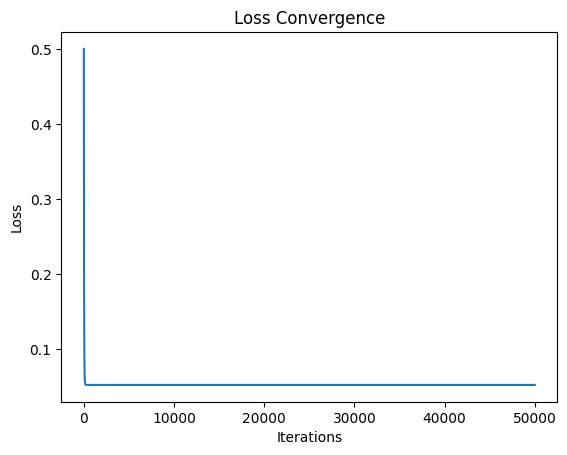

In [60]:
import matplotlib.pyplot as plt

plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Convergence")
plt.show()


In [61]:
#examining stochastic gradient descent
model_sgd = LinearRegression(learn_rate= 0.01, iter=50, method='stochastic')
model_sgd.fit(X_train, y_train)
predictions_on_test = model_sgd.predict(X_test)

prediction_on_train = model_sgd.predict(X_train)

mse_on_sgd = np.mean((predictions_on_test - y_test) ** 2)
print("Mean Squared Error with SGD:", mse_on_sgd)

mae_on_sgd = np.mean(np.abs(predictions_on_test - y_test))
print("Mean Absolute Error with SGD:", mae_on_sgd)

rmse_on_sgd = np.sqrt(mse_on_sgd)
print("Root Mean Squared Error with SGD:", rmse_on_sgd)

ss_res_sgd = np.sum((y_test - predictions_on_test) ** 2)
sst_tot_sgd = np.sum((y_test - np.mean(y_test))** 2)
r2_score_on_sgd = 1 - (ss_res_sgd / sst_tot_sgd)
print("R^2 Score on test set with SGD:", r2_score_on_sgd)

ss_res_train_sgd = np.sum((y_train - prediction_on_train) ** 2)
sst_tot_train_sgd = np.sum((y_train - np.mean(y_train))**2)
r2_score_train_sgd = 1 - (ss_res_train_sgd / sst_tot_train_sgd)
print("R^2 Score on training set with SGD:", r2_score_train_sgd)

                           
                     

Loss at iteration 0: 0.0683792807851759
Mean Squared Error with SGD: 0.13031867175251377
Mean Absolute Error with SGD: 0.30093482937547944
Root Mean Squared Error with SGD: 0.3609967752660871
R^2 Score on test set with SGD: 0.892915310055873
R^2 Score on training set with SGD: 0.8942693170004754


In [62]:
#examining mini-batch gradient descent
model_mini = LinearRegression(learn_rate= 0.01, iter=1000, method='mini-batch', batch_size=16)
model_mini.fit(X_train, y_train)
predictions_on_test = model_mini.predict(X_test)

prediction_on_train = model_mini.predict(X_train)

mse_on_mini_train = np.mean((prediction_on_train - y_train)**2)
print("Mean Squared Error with Mini-Batch GD:", mse_on_mini_train)

rmse_on_mini_train = np.sqrt(mse_on_mini_train)
print("Root Mean Squared Error with Mini-Batch GD:", rmse_on_mini_train)

mae_on_mini_train = np.mean(np.abs(prediction_on_train - y_train))
print("Mean Absolute Error with Mini-Batch GD:", mae_on_mini_train)

ss_res_mini_train = np.sum((y_train - prediction_on_train) ** 2)
sst_tot_mini_train = np.sum((y_train - np.mean(y_train))**2)
r2_score_on_mini_train = 1 - (ss_res_mini_train / sst_tot_mini_train)
print("R^2 Score on training set with Mini-Batch GD:", r2_score_on_mini_train)

mse_on_mini_test = np.mean((predictions_on_test - y_test) ** 2) 
print("Mean Squared Error on test set with Mini-Batch GD:", mse_on_mini_test)

rmse_on_mini_test = np.sqrt(mse_on_mini_test)
print("Root Mean Squared Error on test set with Mini-Batch GD:", rmse_on_mini_test)

mae_on_mini_test = np.mean(np.abs(predictions_on_test - y_test))
print("Mean Absolute Error on test set with Mini-Batch GD:", mae_on_mini_test)

ss_res_mini_test = np.sum((y_test - predictions_on_test)** 2)
ss_tot_mini_test = np.sum((y_test - np.mean(y_test))**2)
r2_score_on_mini_test = 1 - (ss_res_mini_test / ss_tot_mini_test)
print("R^2 Score on test set with Mini-Batch GD:", r2_score_on_mini_test)   


Loss at iteration 0: 0.41031326682595726
Mean Squared Error with Mini-Batch GD: 0.10429926496915673
Root Mean Squared Error with Mini-Batch GD: 0.3229539672602842
Mean Absolute Error with Mini-Batch GD: 0.23540058249956708
R^2 Score on training set with Mini-Batch GD: 0.8957007350308432
Mean Squared Error on test set with Mini-Batch GD: 0.12236733755724838
Root Mean Squared Error on test set with Mini-Batch GD: 0.34981043088685676
Mean Absolute Error on test set with Mini-Batch GD: 0.2868895779725852
R^2 Score on test set with Mini-Batch GD: 0.8994490334701135
